In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import plotly.express as px

%matplotlib inline  

### Importing the data set

In [5]:
%pip install xlrd

data = pd.read_excel(r'default of credit card clients.xls')


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [6]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
data.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [9]:
for i in data.columns:
    print(i)

LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


In [10]:
data.isna().sum().reset_index()

,index,0
0,LIMIT_BAL,0
1,SEX,0
2,EDUCATION,0
3,MARRIAGE,0
4,AGE,0
5,PAY_0,0
6,PAY_2,0
7,PAY_3,0
8,PAY_4,0
9,PAY_5,0


In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [12]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<Axes: title={'center': 'Default Payment Next Month Distribution'}, xlabel='Default Payment Next Month', ylabel='Counts'>

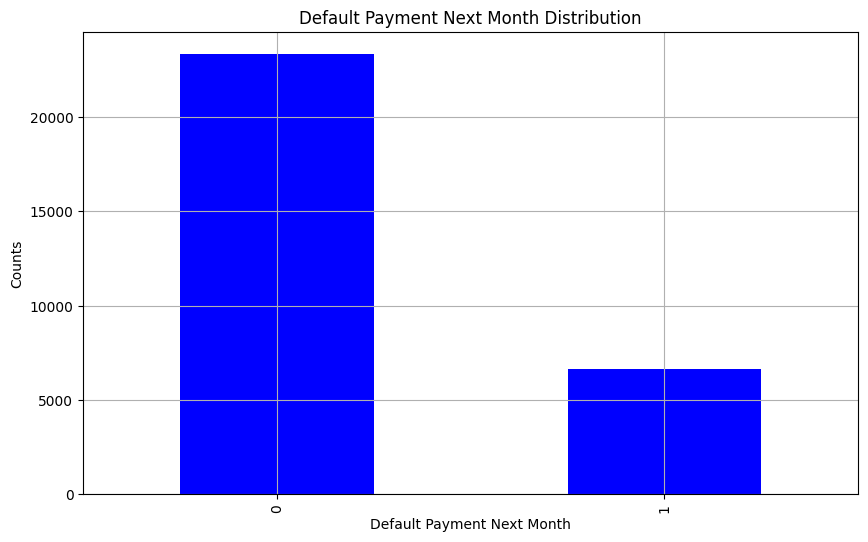

In [13]:
data.groupby('default payment next month').size().reset_index(name='counts').plot(kind='bar', x='default payment next month', y='counts', color='blue', title='Default Payment Next Month Distribution',grid=True, figsize=(10, 6)
                                                                                  ,style= ['o', 'o'], legend=False, xlabel='Default Payment Next Month', ylabel='Counts',)

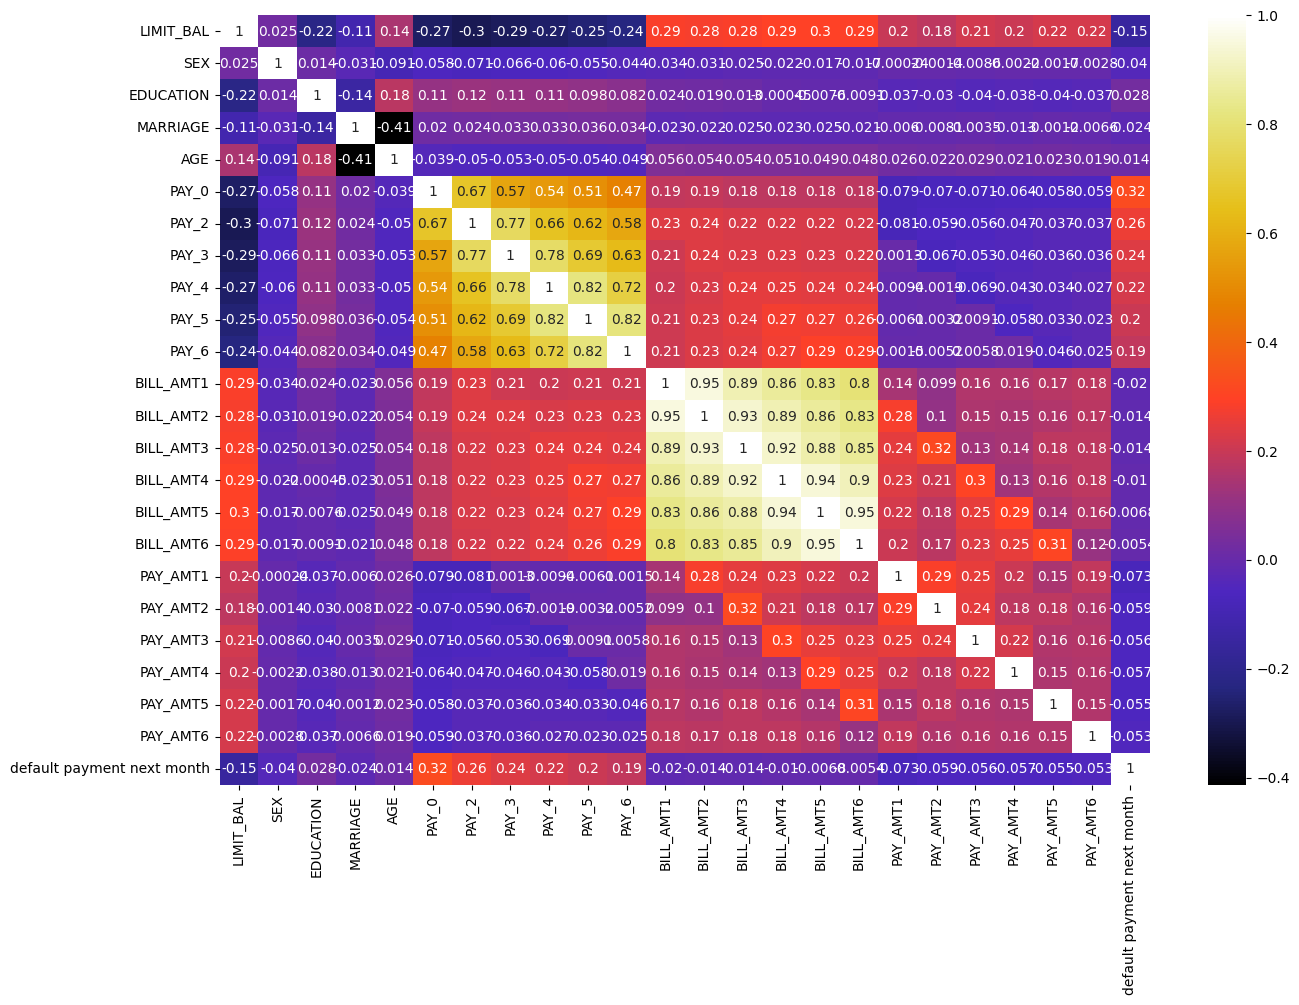

In [14]:
sns.heatmap(data.corr(), annot=True, cmap='CMRmap').figure.set_size_inches(15, 10)

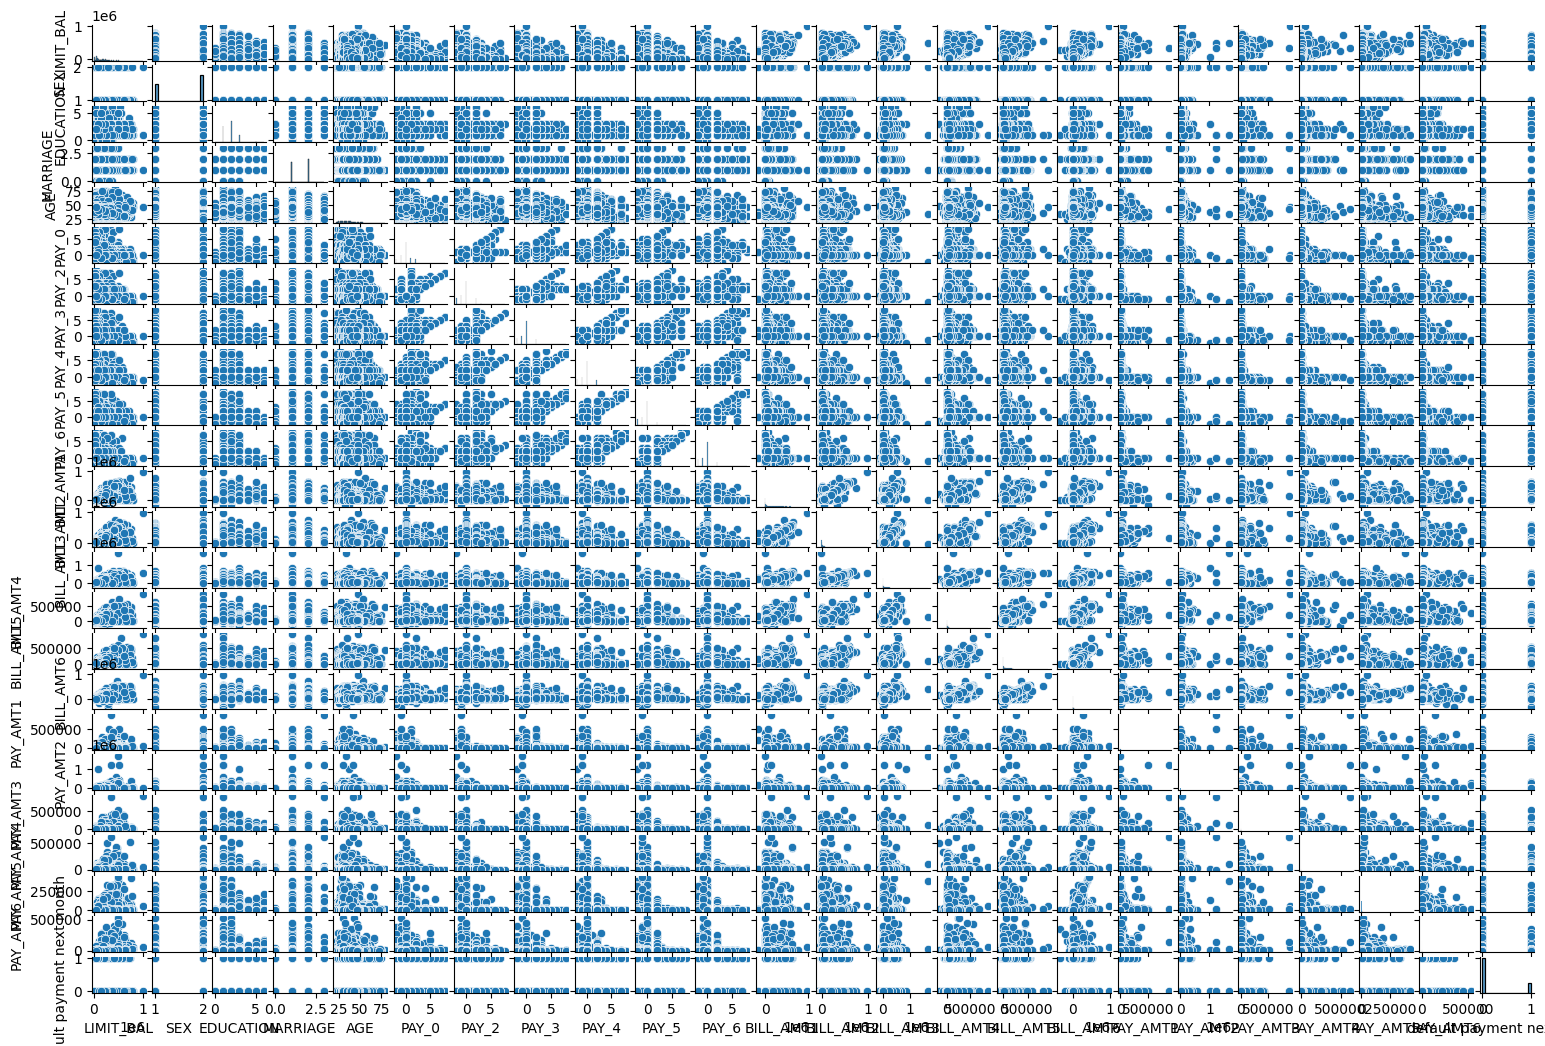

In [15]:
sns.pairplot(data).figure.set_size_inches(15, 10)

In [16]:
high_corr=[]
for i in data.corr().columns:
    for j in data.corr().index:
        if abs(data.corr()[i][j]) > 0.85 and i != j:
            high_corr.append((i, j, data.corr()[i][j]))

In [17]:
for i in high_corr:
    print(i)

('BILL_AMT1', 'BILL_AMT2', np.float64(0.9514836727518136))
('BILL_AMT1', 'BILL_AMT3', np.float64(0.8922785291271761))
('BILL_AMT1', 'BILL_AMT4', np.float64(0.8602721890293095))
('BILL_AMT2', 'BILL_AMT1', np.float64(0.9514836727518136))
('BILL_AMT2', 'BILL_AMT3', np.float64(0.9283262592714855))
('BILL_AMT2', 'BILL_AMT4', np.float64(0.8924822912577209))
('BILL_AMT2', 'BILL_AMT5', np.float64(0.859778307271445))
('BILL_AMT3', 'BILL_AMT1', np.float64(0.8922785291271761))
('BILL_AMT3', 'BILL_AMT2', np.float64(0.9283262592714855))
('BILL_AMT3', 'BILL_AMT4', np.float64(0.9239694565909823))
('BILL_AMT3', 'BILL_AMT5', np.float64(0.8839096973620155))
('BILL_AMT3', 'BILL_AMT6', np.float64(0.8533200905940468))
('BILL_AMT4', 'BILL_AMT1', np.float64(0.8602721890293095))
('BILL_AMT4', 'BILL_AMT2', np.float64(0.8924822912577209))
('BILL_AMT4', 'BILL_AMT3', np.float64(0.9239694565909823))
('BILL_AMT4', 'BILL_AMT5', np.float64(0.9401344040880004))
('BILL_AMT4', 'BILL_AMT6', np.float64(0.9009409547978421)

### spliting the data set into dependent and indepentent

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']

In [20]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (20100, 23)
Shape of x_test: (9900, 23)
Shape of y_train: (20100,)
Shape of y_test: (9900,)


#### preprocessing the data 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [23]:
x_train_scaled = pd.DataFrame(data = x_train_scaled, columns = x_train.columns, index = x_train.index)

In [24]:
x_train_scaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,-0.365093,-1.238563,1.448725,-1.054777,1.464785,0.015441,-0.724837,-0.697423,-0.668007,-0.647249,...,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621
4222,-1.061279,-1.238563,-1.073197,0.861786,0.271955,1.794063,0.110028,0.141588,0.189890,0.238910,...,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573
8736,-0.597155,0.807387,0.187764,0.861786,0.380394,0.015441,0.110028,0.141588,0.189890,0.238910,...,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511
27880,-0.287739,0.807387,1.448725,-1.054777,-1.029313,0.015441,0.110028,1.819611,1.905684,2.011229,...,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958
29290,-0.906571,-1.238563,1.448725,0.861786,-1.029313,1.794063,0.110028,0.141588,0.189890,0.238910,...,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889


In [25]:
x_test_scaled = pd.DataFrame(data= x_test_scaled, columns = x_test.columns, index = x_test.index)

In [26]:
x_test_scaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,-1.061279,-1.238563,0.187764,0.861786,-1.137752,0.015441,0.110028,0.141588,0.18989,0.23891,...,-0.508501,-0.476653,-0.438115,-0.406035,-0.243106,-0.157335,-0.202994,-0.210070,-0.212120,-0.181876
22404,-0.133030,0.807387,-1.073197,0.861786,-1.029313,0.015441,0.110028,0.141588,0.18989,0.23891,...,1.008202,0.915715,0.620849,0.651086,-0.067197,-0.069302,-0.112064,-0.139582,-0.137731,-0.144207
23397,-0.751863,0.807387,1.448725,-1.054777,-0.378679,0.015441,0.110028,0.141588,0.18989,0.23891,...,0.313309,0.417785,0.494650,0.531686,-0.188260,-0.113535,-0.120878,-0.152426,-0.148485,-0.150682
25058,-0.287739,-1.238563,1.448725,0.861786,1.464785,0.015441,0.110028,0.141588,0.18989,0.23891,...,-0.442250,-0.409101,-0.479134,-0.539521,-0.236626,-0.164898,0.098863,-0.300593,0.138571,-0.046291
2664,-0.906571,0.807387,0.187764,0.861786,0.055077,0.015441,0.110028,0.141588,0.18989,0.23891,...,-0.064326,-0.367236,-0.329299,-0.327965,-0.213650,-0.177029,-0.230365,-0.191634,-0.307572,-0.238182


#### Model building 

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [28]:
pred = gnb.fit(x_train_scaled, y_train)

In [29]:
y_pred = gnb.predict(x_test_scaled)

In [30]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6485858585858586


In [32]:
print(confusion_matrix(y_test, y_pred))

[[4923 2819]
 [ 660 1498]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      7742
           1       0.35      0.69      0.46      2158

    accuracy                           0.65      9900
   macro avg       0.61      0.67      0.60      9900
weighted avg       0.77      0.65      0.68      9900



<Axes: >

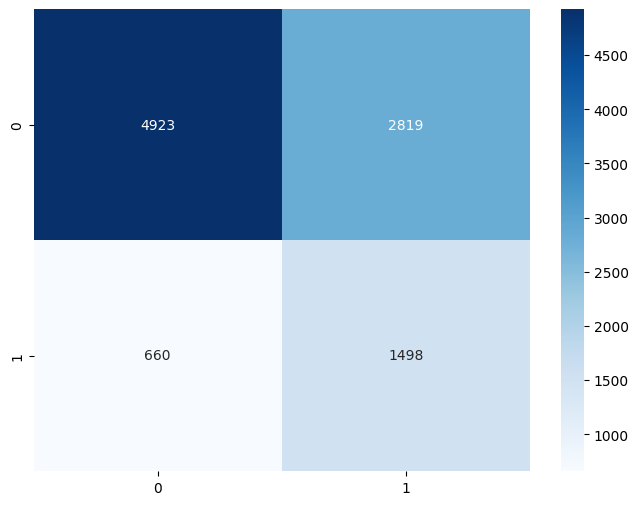

In [34]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [35]:
from sklearn.model_selection import GridSearchCV
params= {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,0.5, 1, 2, 5, 10, 20, 50, 100]
}
grid = GridSearchCV(
    estimator=gnb, 
    param_grid=params, 
    scoring='accuracy', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

In [36]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.5, 1, 2, 5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [37]:
grid.best_estimator_

GaussianNB(var_smoothing=2)

In [38]:
best_params = grid.best_params_
print("Best parameters:", best_params)

Best parameters: {'var_smoothing': 2}


In [39]:
gnb_best = GaussianNB(var_smoothing=best_params['var_smoothing'])
gnb_best.fit(x_train_scaled, y_train)

GaussianNB(var_smoothing=2)

In [40]:
y_pred= gnb_best.predict(x_test_scaled)

In [41]:
accuracy_score(y_test, y_pred)

0.8055555555555556

In [42]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.94      0.88      7742\n           1       0.61      0.31      0.41      2158\n\n    accuracy                           0.81      9900\n   macro avg       0.72      0.63      0.65      9900\nweighted avg       0.78      0.81      0.78      9900\n'

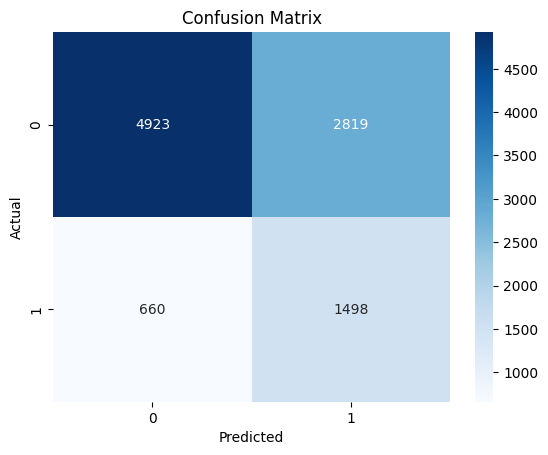

In [43]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
%pip install joblib

import joblib
joblib.dump(gnb_best, 'gnb_credit_card_model.joblib')


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['gnb_credit_card_model.joblib']

In [45]:
x_train_scaled.columns.to_list()    

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
x_train_scaled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,-0.365093,-1.238563,1.448725,-1.054777,1.464785,0.015441,-0.724837,-0.697423,-0.668007,-0.647249,...,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621
4222,-1.061279,-1.238563,-1.073197,0.861786,0.271955,1.794063,0.110028,0.141588,0.189890,0.238910,...,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573
8736,-0.597155,0.807387,0.187764,0.861786,0.380394,0.015441,0.110028,0.141588,0.189890,0.238910,...,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511
27880,-0.287739,0.807387,1.448725,-1.054777,-1.029313,0.015441,0.110028,1.819611,1.905684,2.011229,...,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958
29290,-0.906571,-1.238563,1.448725,0.861786,-1.029313,1.794063,0.110028,0.141588,0.189890,0.238910,...,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-0.906571,-1.238563,0.187764,0.861786,-0.378679,0.015441,0.110028,0.141588,0.189890,0.238910,...,0.128727,0.201954,-0.181383,-0.553489,-0.213650,-0.117947,-0.198012,-0.297827,-0.235410,3.839564
5390,0.253740,-1.238563,-1.073197,0.861786,0.163516,1.794063,1.779758,1.819611,1.905684,2.011229,...,1.754294,1.895071,2.130740,2.256508,0.463829,0.000218,-0.285109,0.158658,0.074237,-0.069264
860,-0.906571,-1.238563,-1.073197,0.861786,-1.029313,-1.763180,-1.559703,-1.536434,-1.525905,-1.533408,...,-0.675622,-0.673460,-0.664976,-0.657092,-0.331473,-0.236112,-0.285109,-0.302252,-0.307572,-0.294488
15795,-0.751863,0.807387,0.187764,0.861786,-1.137752,0.015441,0.110028,0.141588,0.189890,2.011229,...,0.062534,-0.123997,-0.191390,-0.182356,-0.154739,-0.157335,-0.038763,-0.228507,-0.307572,-0.226921


In [49]:
data_1 = pd.DataFrame(data=data.describe())

In [51]:
data_1.pivot_table = data_1.T.reset_index().rename(columns={'index': 'Features'})

In [55]:
# Select only the statistics rows you want, and set 'Features' as index
pivote = data_1.pivot_table.set_index('Features')[['mean', 'std', 'min', 'max']]

In [ ]:
pivote[['min', 'max']].iloc['BILL_']

,min,max
Features,,
LIMIT_BAL,10000.0,1000000.0
SEX,1.0,2.0
EDUCATION,0.0,6.0
MARRIAGE,0.0,3.0
AGE,21.0,79.0
PAY_0,-2.0,8.0
PAY_2,-2.0,8.0
PAY_3,-2.0,8.0
PAY_4,-2.0,8.0
